<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/AMPds_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv('/content/drive/My Drive/Electricity_P.csv')

In [31]:
data1 = data
data1['UNIX_TS'] = [datetime.fromtimestamp(waktu) for waktu in data['UNIX_TS']]

In [32]:
data.columns

Index(['UNIX_TS', 'WHE', 'RSE', 'GRE', 'MHE', 'B1E', 'BME', 'CWE', 'DWE',
       'EQE', 'FRE', 'HPE', 'OFE', 'UTE', 'WOE', 'B2E', 'CDE', 'DNE', 'EBE',
       'FGE', 'HTE', 'OUE', 'TVE', 'UNE'],
      dtype='object')

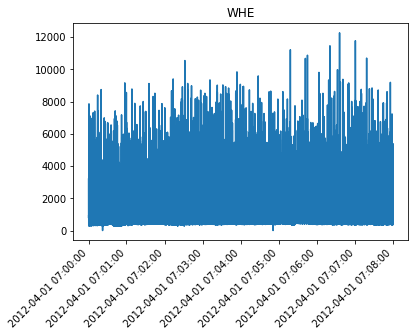

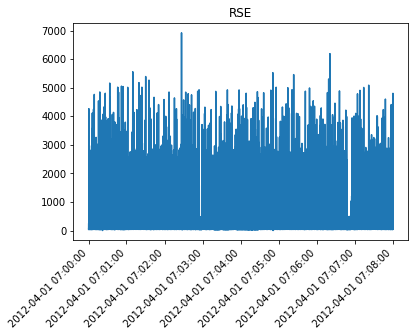

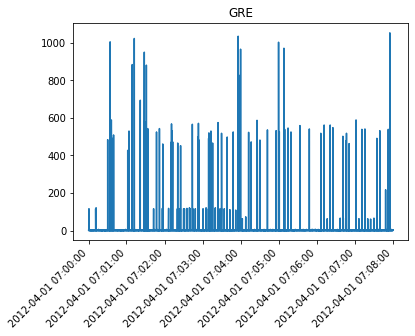

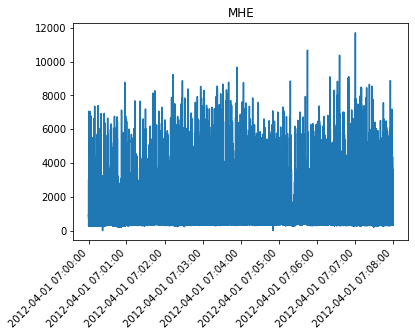

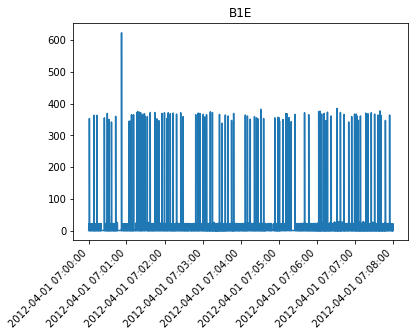

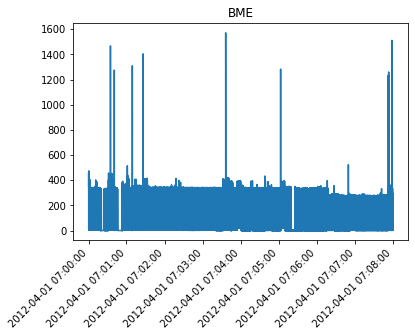

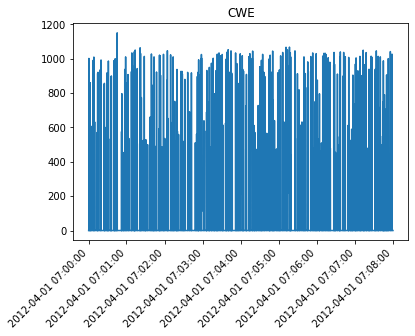

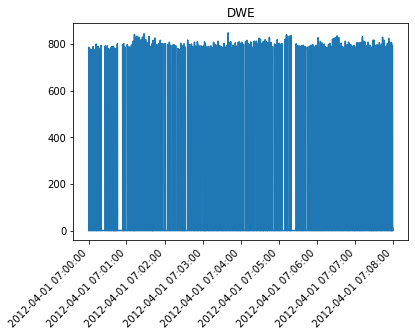

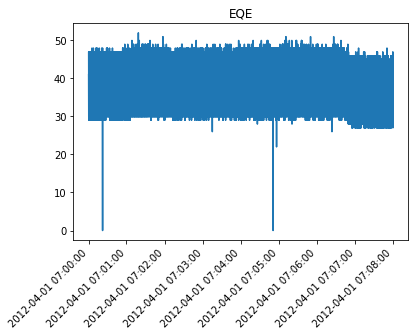

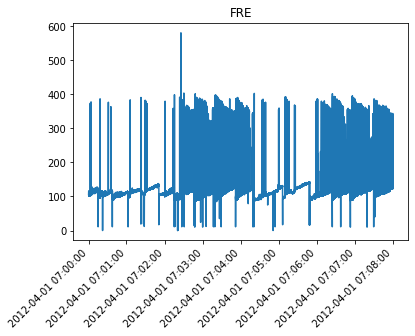

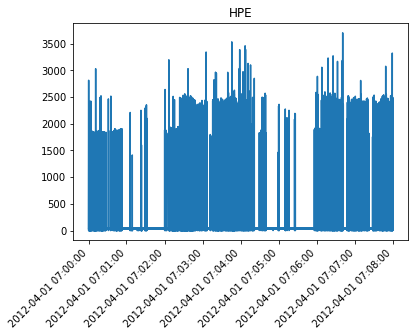

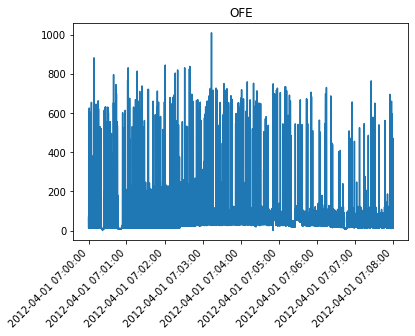

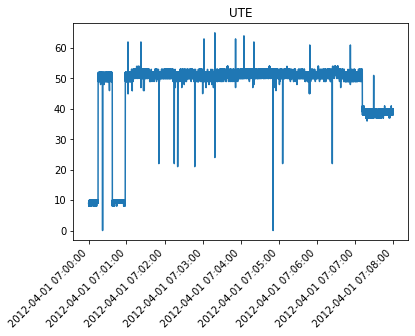

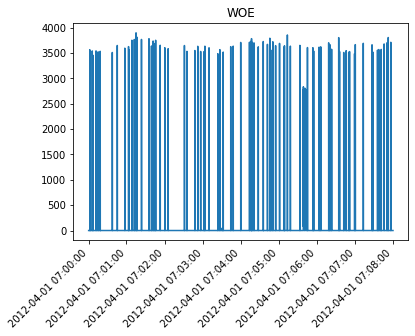

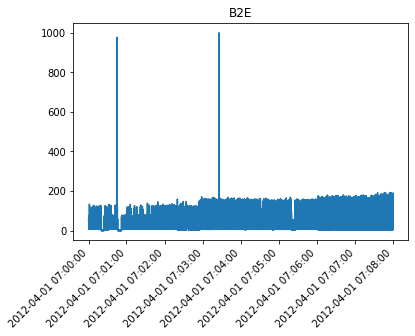

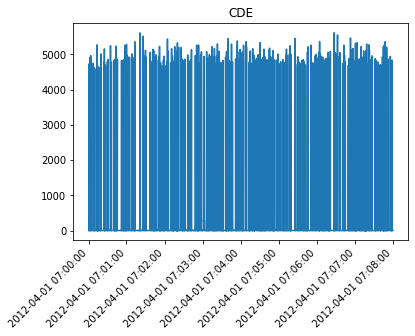

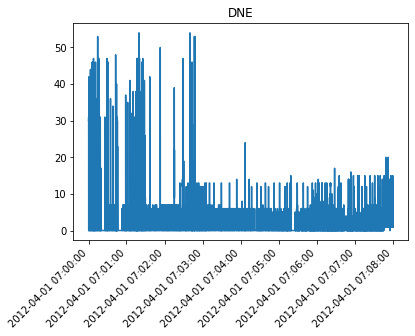

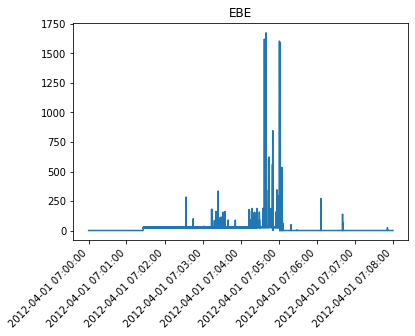

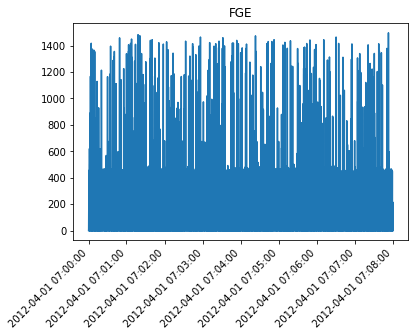

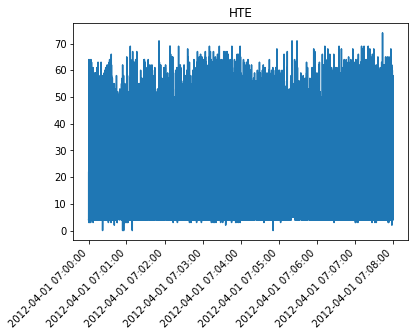

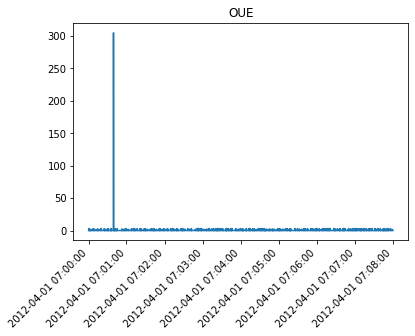

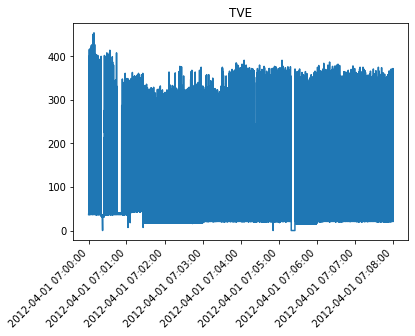

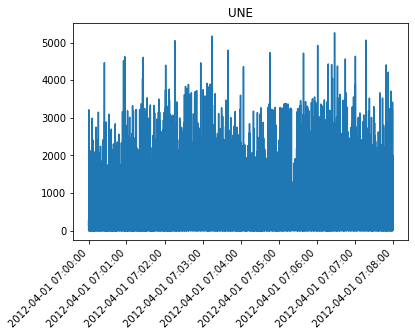

In [33]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.plot(data1['UNIX_TS'],data1[i])
  axes.set_xticklabels(data1['UNIX_TS'], rotation = 45, ha="right")
  plt.show()

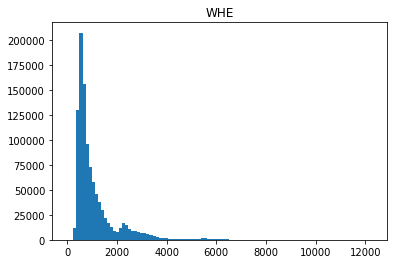

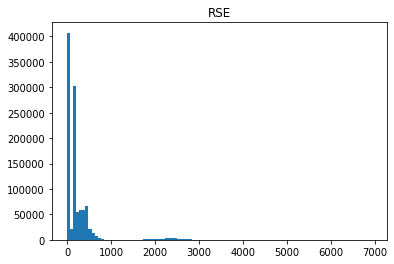

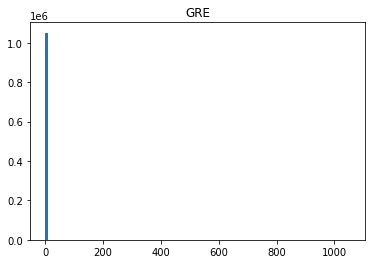

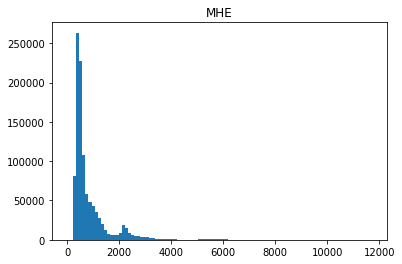

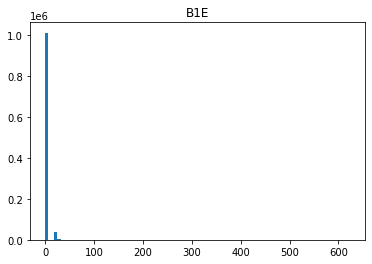

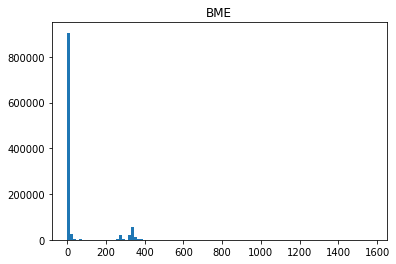

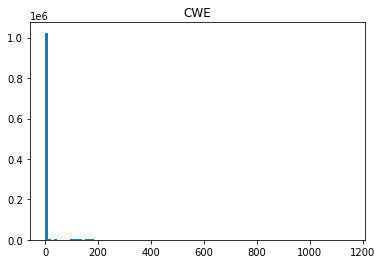

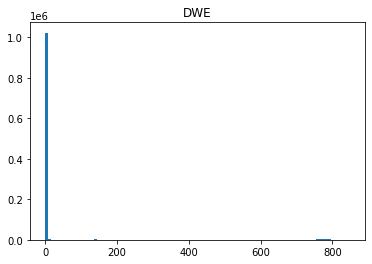

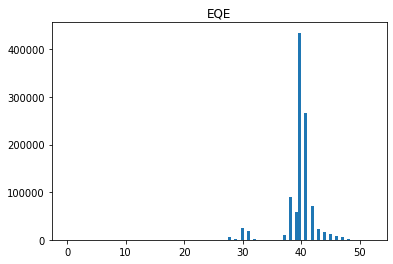

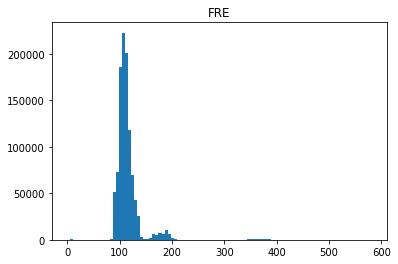

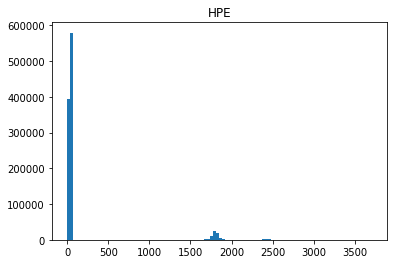

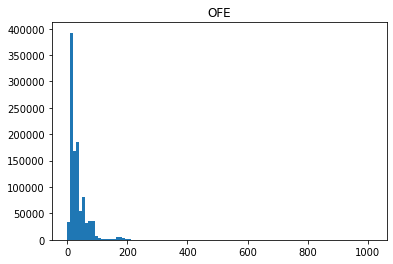

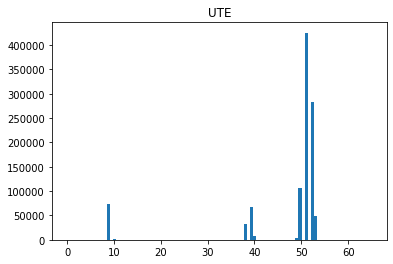

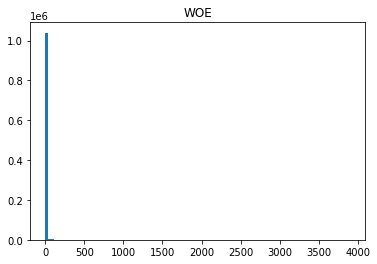

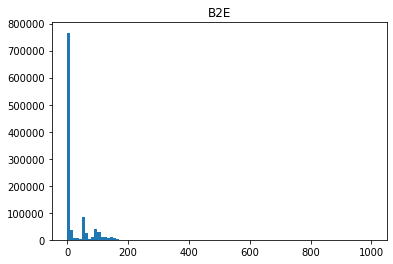

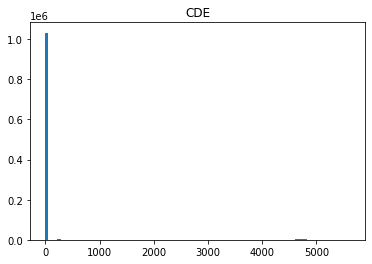

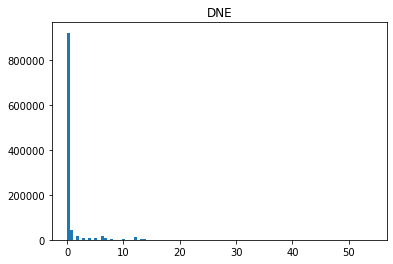

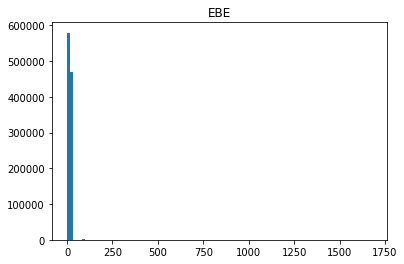

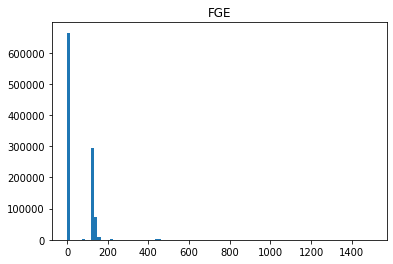

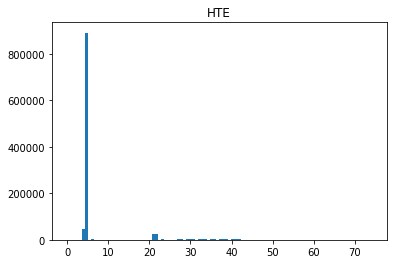

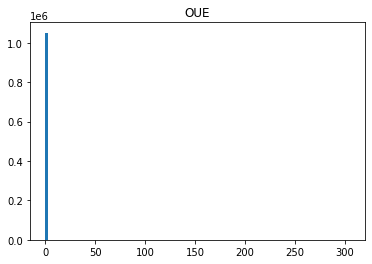

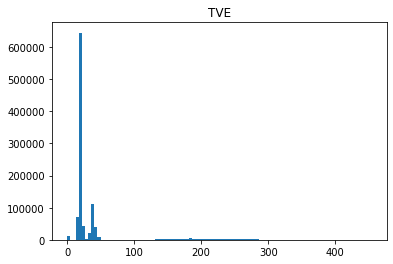

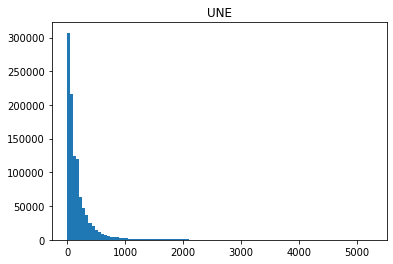

In [28]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.hist(data1[i], bins=100, range=[0,data1[i].max()])
  # axes.set_xticklabels(X_test.index, rotation = 45, ha="right")
  plt.show()

In [34]:
output_label = ["BME", "CDE", "FGE", "HPE", "TVE", "WOE", "UNE"]

In [35]:
# data1["WHE"] = data["WHE"].to_numpy() - 
# data.drop([output_label], axis=1)
data1["WHE"] = data["WHE"].to_numpy() - data.drop(output_label+["UNIX_TS"]+["WHE"]+["RSE"]
                                                  ,axis=1).to_numpy().sum(axis=1)

In [36]:
data.head()

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,HPE,OFE,UTE,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
0,2012-04-01 07:00:00,-267,43,2,873,0,352,0,0,41,106,36,62,9,0,58,0,30,0,0,4,0,37,138
1,2012-04-01 07:01:00,-261,43,0,870,0,354,0,0,35,107,37,61,9,0,58,0,30,0,0,4,0,37,138
2,2012-04-01 07:02:00,-217,43,2,827,0,354,0,0,41,107,38,61,9,0,8,0,30,0,0,4,0,37,138
3,2012-04-01 07:03:00,-214,43,2,827,0,354,0,0,40,106,37,61,9,0,7,0,30,0,0,4,0,37,142
4,2012-04-01 07:04:00,-218,41,2,729,0,352,0,0,40,106,36,61,9,0,8,0,31,0,0,4,0,37,45


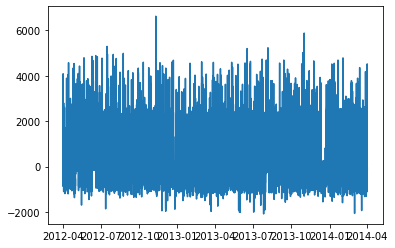

In [37]:
plt.plot(data1["UNIX_TS"],data1["WHE"])
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data1['UNIX_TS'], data1['B1E'], test_size=0.30, random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(735840,)
(315360,)
(735840,)
(315360,)


In [40]:
latency_data = 10

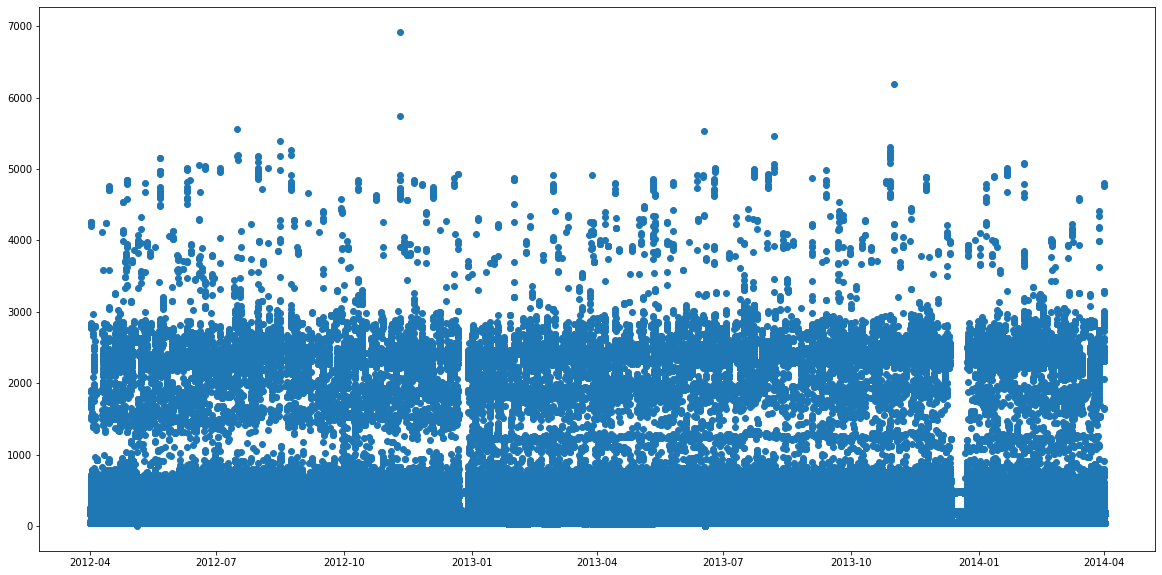

In [41]:
plt.figure(figsize=[20,10])
plt.scatter(data1['UNIX_TS'],data1['RSE'])
plt.show()